In [31]:
# Unsupervised Learning 

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df = df[['sepal length (cm)' , 'sepal width (cm)']]
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'sepal width (cm)')

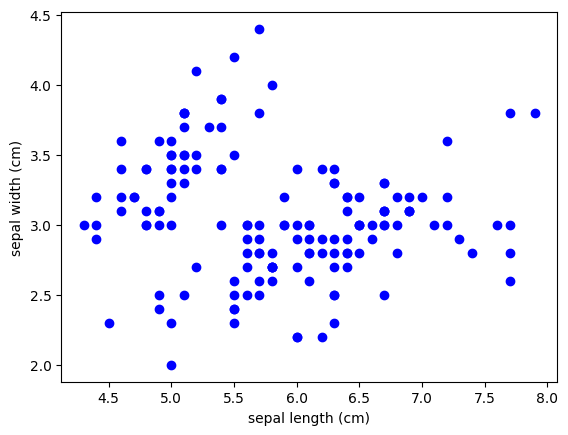

In [20]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c='blue')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [19]:
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Scaling columns

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [24]:
scaler.fit(df[['sepal length (cm)', 'sepal width (cm)']])
df[['sepal length (cm)', 'sepal width (cm)']] = scaler.transform(df[['sepal length (cm)', 'sepal width (cm)']])

In [27]:
df.head(5)

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


training model

In [32]:
model = KMeans()

In [34]:
model.fit(df[['sepal length (cm)', 'sepal width (cm)']])

KMeans()

In [36]:
y_predicted = model.predict(df[['sepal length (cm)', 'sepal width (cm)']])
y_predicted

array([1, 7, 7, 7, 1, 4, 1, 1, 7, 7, 4, 1, 7, 7, 4, 4, 4, 1, 4, 4, 1, 1,
       1, 1, 1, 7, 1, 1, 1, 7, 7, 1, 4, 4, 7, 7, 1, 1, 7, 1, 1, 3, 7, 1,
       4, 7, 4, 7, 4, 1, 5, 5, 5, 3, 2, 2, 5, 3, 5, 3, 3, 2, 3, 2, 2, 5,
       2, 2, 3, 3, 2, 2, 2, 2, 5, 5, 5, 5, 2, 3, 3, 3, 2, 2, 2, 5, 5, 2,
       2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 5, 2, 0, 2, 5, 0, 3, 0, 2, 6,
       5, 2, 5, 3, 2, 5, 5, 6, 0, 3, 5, 2, 0, 2, 5, 0, 2, 2, 2, 0, 0, 6,
       2, 2, 2, 0, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 2], dtype=int32)

In [37]:
df['cluster'] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,7
2,0.111111,0.500000,7
3,0.083333,0.458333,7
4,0.194444,0.666667,1


In [39]:
df['cluster'].value_counts()

cluster
2    41
5    30
1    21
3    18
7    16
4    12
0     9
6     3
Name: count, dtype: int64

In [40]:
model.cluster_centers_

array([[0.87037037, 0.38425926],
       [0.20634921, 0.60912698],
       [0.47154472, 0.33536585],
       [0.30709877, 0.16435185],
       [0.30324074, 0.80208333],
       [0.63703704, 0.47083333],
       [0.91666667, 0.72222222],
       [0.11111111, 0.45052083]])

In [43]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]
df4 = df[df['cluster'] == 4]

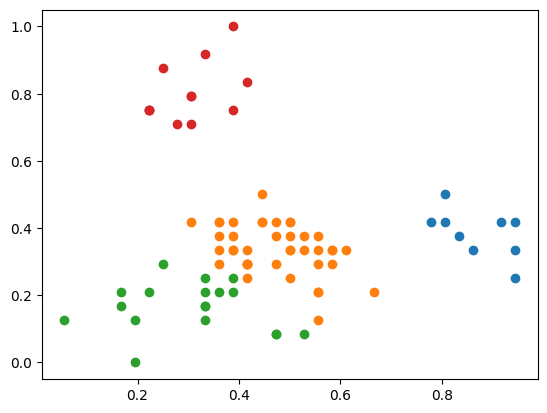

In [45]:
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'])
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'])
plt.scatter(df4['sepal length (cm)'], df4['sepal width (cm)'])

elbow algorithm

In [46]:
sse = []
k_range=range(1,10)

for i in k_range:
    model =KMeans(n_clusters=i)
    km = model.fit(df[['sepal length (cm)', 'sepal width (cm)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Error')

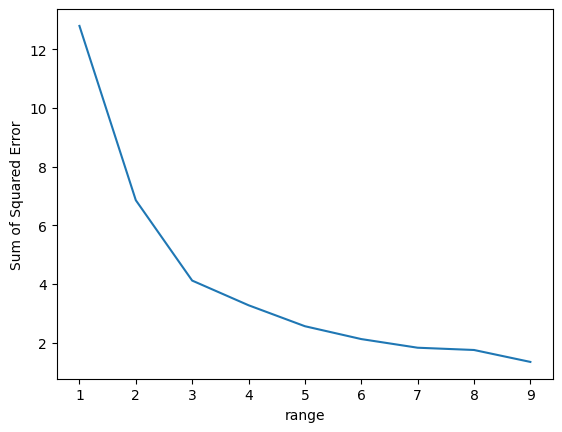

In [50]:
plt.plot(k_range,sse)
plt.xlabel('range')
plt.ylabel('Sum of Squared Error')

If we see above elbow algorithm then n_cluster=3 will be best for our dataset

Making KMeans model with petal data

In [54]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
df = df[['petal length (cm)', 'petal width (cm)']]
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


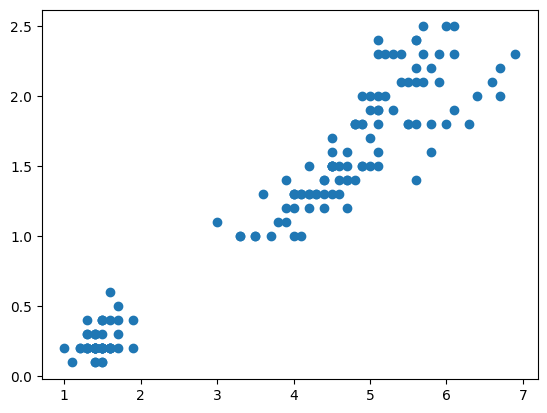

In [59]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [56]:
km = KMeans(n_clusters=3)


In [57]:
y_pred = km.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [60]:
df['y_pred'] = y_pred
df.head()

,petal length (cm),petal width (cm),y_pred
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [62]:
df0 = df[df['y_pred'] == 0]
df1 = df[df['y_pred'] == 1]
df2 = df[df['y_pred'] == 2]

Text(0, 0.5, 'petal width')

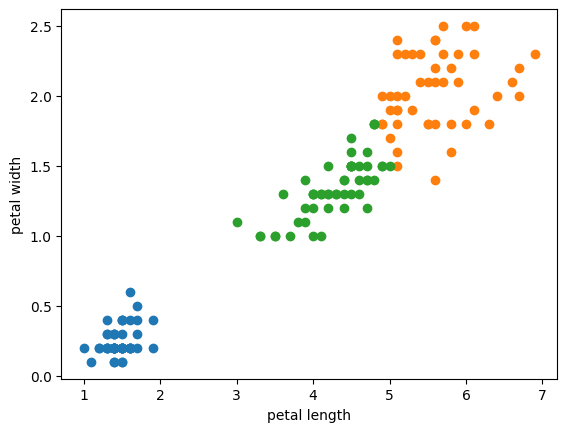

In [65]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'])
plt.xlabel('petal length')
plt.ylabel('petal width')

In [67]:
# Elbow Algorithm 

sse = []
k_range = range(1,10)

for i in k_range:
    model = KMeans(n_clusters=i)
    km = model.fit(df)
    sse.append(km.inertia_)


Text(0, 0.5, 'sum of squared error')

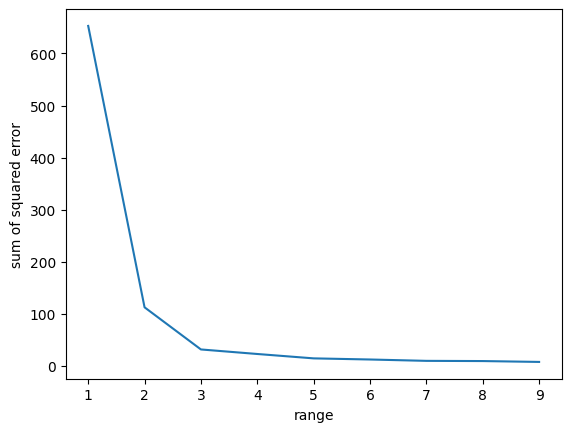

In [70]:
plt.plot(k_range, sse)
plt.xlabel('range')
plt.ylabel('sum of squared error')